In [77]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [81]:
df = pd.read_csv('sign_ups.csv')
df=df.set_index('Unnamed: 0')
df.index.name = None

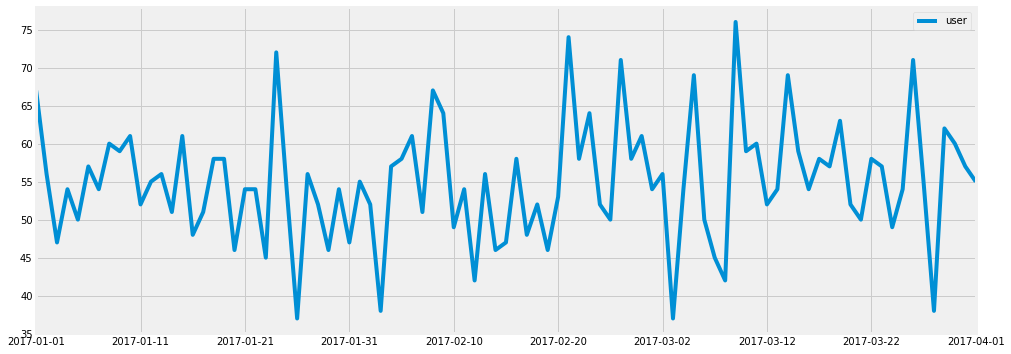

In [82]:
df.plot(figsize=(15, 6))
plt.show()

In [38]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:781.0920564335195
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:478.05093158350957
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:594.2459383152336
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:565.7325371687817
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:493.603815777528
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:485.4543603051739
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:867.014526466944
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:715.3287088994302
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:580.5430085303766
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:470.892671368159
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:596.1063480223855
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:560.0570937484312
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:493.9341133797692
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:477.96898381956123
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:600.5809365684602
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:509.7641216673326
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:606.4778884675205
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:600.9940452753622
ARIMA(0, 1,

In [40]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0806      0.172      0.468      0.640      -0.257       0.418
ma.L1         -1.0000    440.159     -0.002      0.998    -863.696     861.696
ar.S.L12      -0.0002      0.053     -0.003      0.997      -0.104       0.104
ma.S.L12      -0.8227      0.247     -3.337      0.001      -1.306      -0.340
sigma2        67.3688   2.97e+04      0.002      0.998    -5.8e+04    5.82e+04


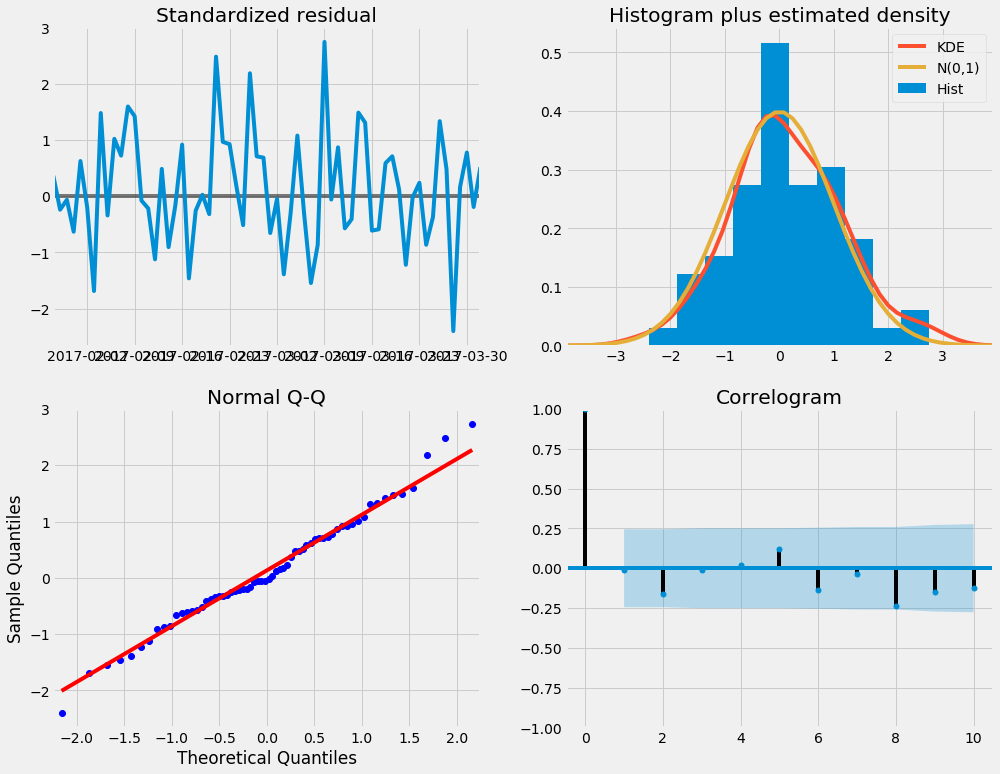

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [83]:
pred = results.get_prediction(start=pd.to_datetime('2017-03-20'), dynamic=False)
pred_ci = pred.conf_int()

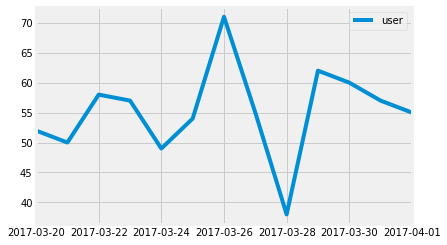

In [107]:
ax = df['2017-03-20':].plot(label='observed')

In [ ]:
ax = df['2017-03-20':].plot(label='observed')
pred.predicted_mean.to_frame().plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('User Acquisition Levels')
plt.legend()

plt.show()

In [108]:
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

In [150]:
y_forecasted = pred.predicted_mean.to_frame()
y_forecasted.columns = ['forecast']
y_truth = df['2017-03-20':]

In [151]:
# Compute the mean square error
mse = ((y_forecasted['forecast'] - y_truth['user']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 61.3


In [152]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-03-20'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

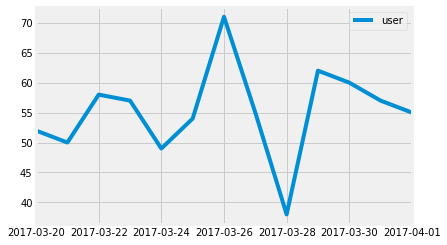

In [155]:
ax = df['2017-03-20':].plot(label='observed')

In [163]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean.to_frame()
y_forecasted.columns = ['forecast']
y_truth = df['2017-03-20':]

In [164]:
# Compute the mean square error
mse = ((y_forecasted['forecast'] - y_truth['user']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 58.85


In [165]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=91)

In [166]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

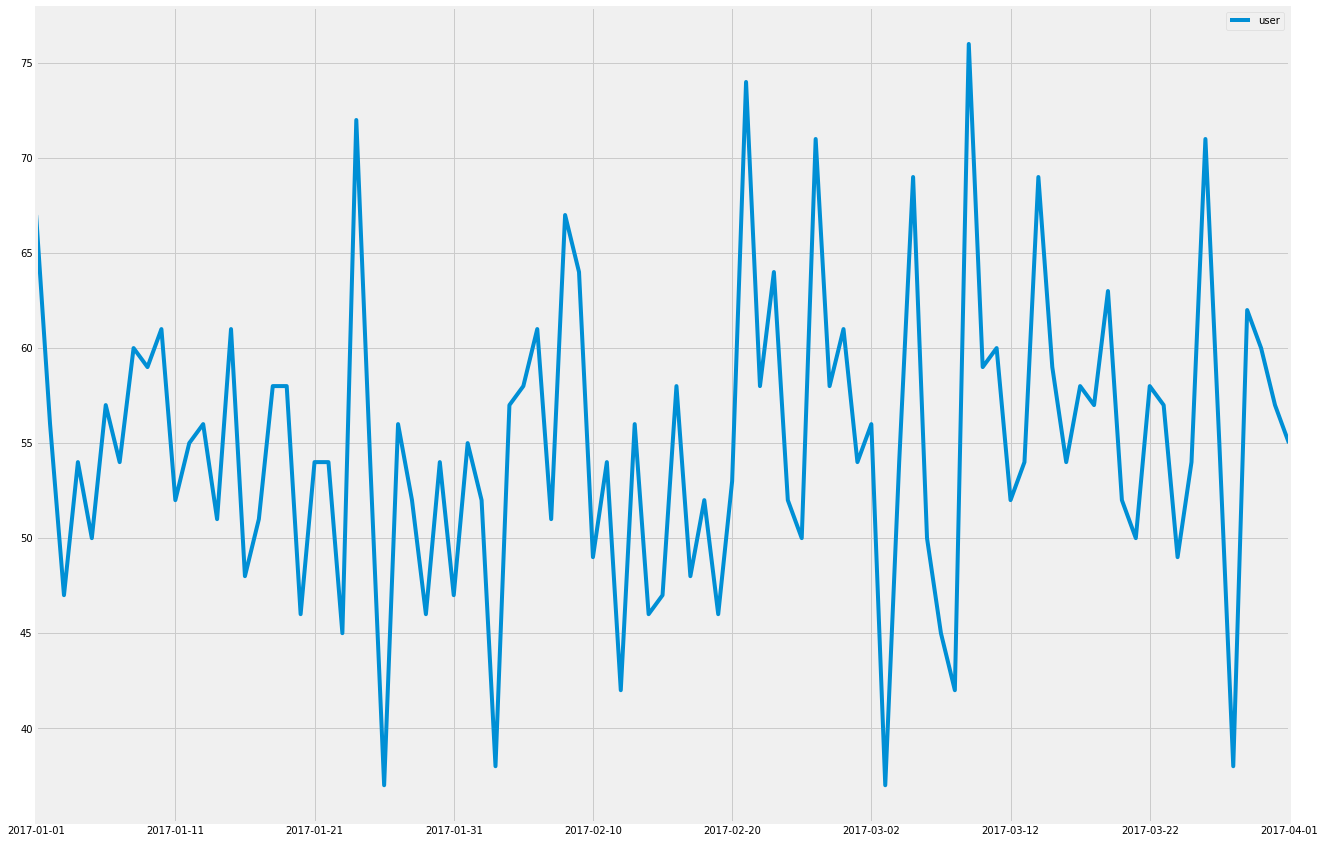

In [167]:
ax = df.plot(label='observed', figsize=(20, 15))

In [170]:
pred_uc = pred_uc.predicted_mean.to_frame()

In [184]:
pred_ci

,lower user,upper user
2017-04-02,42.051731,75.063775
2017-04-03,42.588528,75.784052
2017-04-04,39.245169,72.448163
2017-04-05,38.430411,71.634113
2017-04-06,40.868397,74.072339
2017-04-07,46.253303,79.457441
2017-04-08,34.776549,67.953333
2017-04-09,37.580638,70.764320
2017-04-10,46.310373,79.494684
2017-04-11,38.899212,72.083606


In [186]:
pred_ci.to_csv('user_predictions.csv')